### Description: This program uses the Keltner Channel Trading Strategy to Buy and Sell an asset.

In [1]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import datetime as dt

In [2]:
# Create a function to calculate the Keltner channel
def keltner_channels(data, window=20, atr_multiplier=1):

    # Create an empty dictionary
    keltner_channels = {}

    # Calculate the typical price
    typical_price = (data['High'] + data['Low'] + data['Close']) / 3

    # Calculate the exponential moving average
    exponential_moving_average = typical_price.ewm(span=window, adjust=False).mean()

    # Calculate the Average True Range (ATR)
    true_range = np.maximum(data['High'] - data['Low'], np.maximum(abs(data['High'] - exponential_moving_average), abs(data['Low'] - exponential_moving_average)))
    average_true_range = true_range.ewm(span=window, adjust=False).mean()

    # Calculate the Keltner channel upper and lower bands
    keltner_channels['upper'] = exponential_moving_average + atr_multiplier * average_true_range
    keltner_channels['lower'] = exponential_moving_average - atr_multiplier * average_true_range

    # Calculate the Keltner Channel Middle Band
    keltner_channels['middle'] = exponential_moving_average

    return keltner_channels

In [3]:
# Create a function to plot the Keltner Channel
def plot_keltner_channels(data, keltner_channels):

    fig, ax = plt.subplots(figsize=(10,6))

    # Plot the data
    ax.plot(data.index, data['Close'], label= 'Close')

    # Plot the Keltner Channel Upper, Lower and Middle Bands
    ax.plot(keltner_channels['upper'], label="Upper Band")
    ax.plot(keltner_channels['lower'], label="Lower Band")
    ax.plot(keltner_channels['middle'], label="Middle Band")

    # Shade the area between the bands
    ax.fill_between(keltner_channels['upper'].index, keltner_channels['upper'], keltner_channels['lower'], color='grey', alpha=0.5)

    # Plot the buy and sell signals
    crossed = False
    buy_signal_number = 0
    sell_signal_number = 0
    buy_signal_restraint = 3
    sell_signal_restraint = 15

    for i in range(len(data)):
        if data['Close'].iloc[i] < keltner_channels['lower'].iloc[i]:
            buy_signal_number = buy_signal_number + 1
            sell_signal_number = 0
            if buy_signal_number >= buy_signal_restraint and crossed == False:
                ax.plot(data.index[i], data['Close'].iloc[i], marker= '^', markersize = 10, color = 'green')
                crossed = True
                buy_signal_number = 0
        elif data['Close'].iloc[i] > keltner_channels['upper'].iloc[i]:
            sell_signal_number = sell_signal_number + 1
            buy_signal_number = 0
            if sell_signal_number >= sell_signal_restraint and crossed == True:
                ax.plot(data.index[i], data['Close'].iloc[i], marker= 'v', markersize = 10, color = 'red')
                crossed = False
                sell_signal_number = 0

    # Format the plot
    ax.set_title('Keltner Channels with Buy/Sell Signals')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend()
    plt.show()

In [4]:
# Read in the data
end = dt.datetime.now()
start = end - dt.timedelta(365*5)
df = yf.download('BTC', start, end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-10-01,100.000000,100.000000,100.000000,100.000000,95.702141,0
2020-10-02,100.000000,100.000000,100.000000,100.000000,95.702141,0
2020-10-05,100.029999,100.040001,99.995003,99.995003,95.697372,10725
2020-10-06,100.010002,100.029999,100.010002,100.029999,95.730865,10080
2020-10-07,99.949997,99.959999,99.919998,99.919998,95.625580,6350


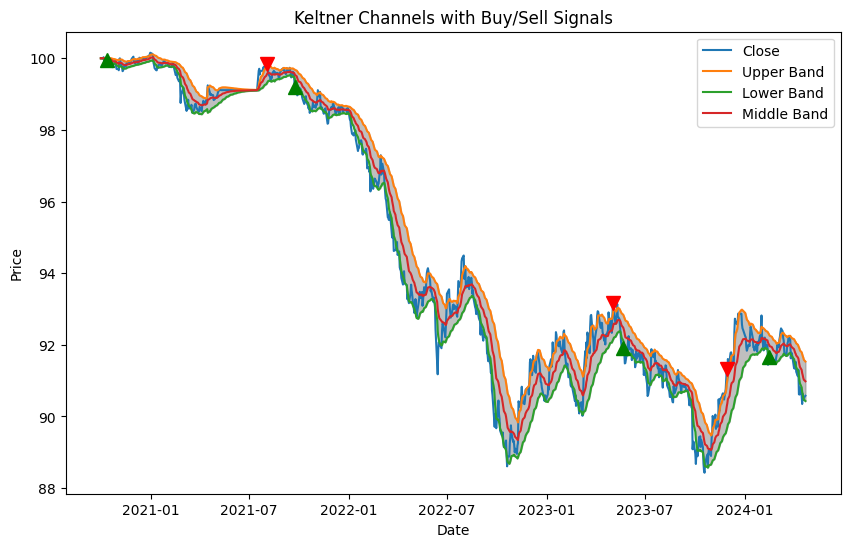

In [5]:
# Get the keltner channels
keltner_channels = keltner_channels(df, window=20, atr_multiplier=1)
# Plot the data and the keltner channels
plot_keltner_channels(df, keltner_channels)